### COVID-19 ICU Prediction Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC  
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Get the curent date/time
today = pd.to_datetime('today')

In [3]:
# Downloads the lates data availlable and saves it.
# Run this step dayly to update the data.

df_Covid_data = pd.read_csv('https://covidtracking.com/data/download/national-history.csv')
# df_Covid_data.to_csv('National_Covid_Data_'+today.strftime("%Y-%m-%d")+'.csv')

In [4]:
# Loads the last saved data. Make sure the data is up to date by running the cell above. 
df_Covid_data = pd.read_csv('National_Covid_Data_'+today.strftime("%Y-%m-%d")+'.csv')
df_Covid_data

,Unnamed: 0,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
0,0,2020-12-06,273374.0,1138,31946.0,20145.0,2256,101487.0,585676.0,161986294,1172590,3322.0,7094.0,14534035,176771,5624444.0,56,204063869,1634532
1,1,2020-12-05,272236.0,2445,31831.0,19950.0,3316,101190.0,583420.0,160813704,1526995,3321.0,7005.0,14357264,211073,5576026.0,56,202429337,2169756
2,2,2020-12-04,269791.0,2563,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,3305.0,6999.0,14146191,224831,5470389.0,56,200259581,1854869
3,3,2020-12-03,267228.0,2706,31276.0,19723.0,5331,100755.0,575452.0,158026052,1238465,3280.0,6867.0,13921360,210204,5404018.0,56,198404712,1828230
4,4,2020-12-02,264522.0,2733,31038.0,19680.0,5028,100322.0,570121.0,156787587,982032,3252.0,6855.0,13711156,195796,5322128.0,56,196576482,1459202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,315,2020-01-26,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
316,316,2020-01-25,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
317,317,2020-01-24,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
318,318,2020-01-23,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,1


In [5]:
# Check for shape, null values and data types of the data
print("Size/Shape of the dataset",df_Covid_data.shape)
print("Checking for null values:\n",df_Covid_data.isnull().sum())
print("Checking Data-type:",df_Covid_data.dtypes)

Size/Shape of the dataset (320, 19)
Checking for null values:
 Unnamed: 0                   0
date                         0
death                       19
deathIncrease                0
inIcuCumulative             63
inIcuCurrently              64
hospitalizedIncrease         0
hospitalizedCurrently       55
hospitalizedCumulative      42
negative                     0
negativeIncrease             0
onVentilatorCumulative      70
onVentilatorCurrently       63
positive                     0
positiveIncrease             0
recovered                   63
states                       0
totalTestResults             0
totalTestResultsIncrease     0
dtype: int64
Checking Data-type: Unnamed: 0                    int64
date                         object
death                       float64
deathIncrease                 int64
inIcuCumulative             float64
inIcuCurrently              float64
hospitalizedIncrease          int64
hospitalizedCurrently       float64
hospitalizedCumulative     

In [6]:
# Print the column names
df_Covid_data.columns

Index(['Unnamed: 0', 'date', 'death', 'deathIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'hospitalizedIncrease', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'negative', 'negativeIncrease',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveIncrease', 'recovered', 'states', 'totalTestResults',
       'totalTestResultsIncrease'],
      dtype='object')

In [7]:
#Drop columns that are not needed for the model
df_Covid_data.drop(['Unnamed: 0','death',\
       'deathIncrease','onVentilatorCumulative','states'],1,inplace = True)

In [8]:
df_Covid_data.columns

Index(['date', 'inIcuCumulative', 'inIcuCurrently', 'hospitalizedIncrease',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'negative',
       'negativeIncrease', 'onVentilatorCurrently', 'positive',
       'positiveIncrease', 'recovered', 'totalTestResults',
       'totalTestResultsIncrease'],
      dtype='object')

In [9]:
df_Covid_data

,date,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
0,2020-12-06,31946.0,20145.0,2256,101487.0,585676.0,161986294,1172590,7094.0,14534035,176771,5624444.0,204063869,1634532
1,2020-12-05,31831.0,19950.0,3316,101190.0,583420.0,160813704,1526995,7005.0,14357264,211073,5576026.0,202429337,2169756
2,2020-12-04,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,6999.0,14146191,224831,5470389.0,200259581,1854869
3,2020-12-03,31276.0,19723.0,5331,100755.0,575452.0,158026052,1238465,6867.0,13921360,210204,5404018.0,198404712,1828230
4,2020-12-02,31038.0,19680.0,5028,100322.0,570121.0,156787587,982032,6855.0,13711156,195796,5322128.0,196576482,1459202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2020-01-26,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
316,2020-01-25,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
317,2020-01-24,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
318,2020-01-23,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,1


In [10]:
# Drop the null rows
df_Covid_data = df_Covid_data.dropna()
df_Covid_data

,date,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
0,2020-12-06,31946.0,20145.0,2256,101487.0,585676.0,161986294,1172590,7094.0,14534035,176771,5624444.0,204063869,1634532
1,2020-12-05,31831.0,19950.0,3316,101190.0,583420.0,160813704,1526995,7005.0,14357264,211073,5576026.0,202429337,2169756
2,2020-12-04,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,6999.0,14146191,224831,5470389.0,200259581,1854869
3,2020-12-03,31276.0,19723.0,5331,100755.0,575452.0,158026052,1238465,6867.0,13921360,210204,5404018.0,198404712,1828230
4,2020-12-02,31038.0,19680.0,5028,100322.0,570121.0,156787587,982032,6855.0,13711156,195796,5322128.0,196576482,1459202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2020-03-30,187.0,3087.0,2472,15917.0,19798.0,818231,95634,451.0,172740,21470,4560.0,1035705,116583
252,2020-03-29,156.0,2456.0,2794,14055.0,17326.0,722597,65412,439.0,151270,19444,4076.0,919122,83552
253,2020-03-28,140.0,2174.0,2409,12409.0,14532.0,657185,97762,390.0,131826,19606,3145.0,835570,100456
254,2020-03-27,124.0,1792.0,2572,10978.0,12123.0,559423,77275,324.0,112220,19244,2418.0,735114,102115


In [11]:
# Set the date as index
df_Covid_data.set_index('date', inplace =True)
df_Covid_data

,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
date,,,,,,,,,,,,,
2020-12-06,31946.0,20145.0,2256,101487.0,585676.0,161986294,1172590,7094.0,14534035,176771,5624444.0,204063869,1634532
2020-12-05,31831.0,19950.0,3316,101190.0,583420.0,160813704,1526995,7005.0,14357264,211073,5576026.0,202429337,2169756
2020-12-04,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,6999.0,14146191,224831,5470389.0,200259581,1854869
2020-12-03,31276.0,19723.0,5331,100755.0,575452.0,158026052,1238465,6867.0,13921360,210204,5404018.0,198404712,1828230
2020-12-02,31038.0,19680.0,5028,100322.0,570121.0,156787587,982032,6855.0,13711156,195796,5322128.0,196576482,1459202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-30,187.0,3087.0,2472,15917.0,19798.0,818231,95634,451.0,172740,21470,4560.0,1035705,116583
2020-03-29,156.0,2456.0,2794,14055.0,17326.0,722597,65412,439.0,151270,19444,4076.0,919122,83552
2020-03-28,140.0,2174.0,2409,12409.0,14532.0,657185,97762,390.0,131826,19606,3145.0,835570,100456


In [12]:
# Specified data columns to be used in the model 
X = df_Covid_data[['onVentilatorCurrently','hospitalizedIncrease','hospitalizedCurrently','positive',\
             'positiveIncrease']]
y = df_Covid_data['inIcuCurrently'].values.reshape(-1,1)
y

array([[20145.],
       [19950.],
       [19858.],
       [19723.],
       [19680.],
       [19295.],
       [18801.],
       [18437.],
       [18249.],
       [18061.],
       [18019.],
       [17740.],
       [17314.],
       [17080.],
       [16411.],
       [16264.],
       [16138.],
       [15763.],
       [15558.],
       [15018.],
       [14494.],
       [13849.],
       [13491.],
       [13279.],
       [12911.],
       [12625.],
       [12071.],
       [11638.],
       [11223.],
       [11215.],
       [11213.],
       [11046.],
       [10892.],
       [10530.],
       [ 9970.],
       [ 9665.],
       [ 9613.],
       [ 9549.],
       [ 9320.],
       [ 9134.],
       [ 8997.],
       [ 8942.],
       [ 8590.],
       [ 8675.],
       [ 8340.],
       [ 8178.],
       [ 8291.],
       [ 8213.],
       [ 8069.],
       [ 7383.],
       [ 7466.],
       [ 7328.],
       [ 7302.],
       [ 7239.],
       [ 7096.],
       [ 6866.],
       [ 6749.],
       [ 6752.],
       [ 6785.

In [13]:

print(X.shape, y.shape)

(256, 5) (256, 1)


## Train-Test-Split Data

In [14]:
# Split the data to testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y,)


In [15]:
X_train

,onVentilatorCurrently,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease
date,,,,,
2020-11-19,4859.0,4420,80682.0,11556239,182835
2020-04-25,5266.0,2305,57343.0,942523,35651
2020-05-06,4753.0,2159,52581.0,1231277,25143
2020-09-13,1562.0,545,29921.0,6461066,34311
2020-05-13,6156.0,1791,46918.0,1394217,21628
...,...,...,...,...,...
2020-04-16,5940.0,3165,59498.0,672087,31577
2020-12-03,6867.0,5331,100755.0,13921360,210204
2020-04-23,5464.0,2827,59216.0,872598,31970


In [16]:
# Choose the model
model = LinearRegression()
model

LinearRegression()

In [17]:
# model.fit(X_train, y_train)

In [18]:
# print(f"Training Data Score: {model.score(X_train, y_train)}")
# print(f"Testing Data Score: {model.score(X_test, y_test)}")

In [19]:
# print('Weight coefficients:', model.coef_)
# print('y-axis intercept:', model.intercept_)

### Skaling the data using StandardScaler, and plotting a residual plot


In [20]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [21]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [22]:
X_train = X_scaler.inverse_transform(X_train_scaled)
X_train

array([[ 4.8590000e+03,  4.4200000e+03,  8.0682000e+04,  1.1556239e+07,
         1.8283500e+05],
       [ 5.2660000e+03,  2.3050000e+03,  5.7343000e+04,  9.4252300e+05,
         3.5651000e+04],
       [ 4.7530000e+03,  2.1590000e+03,  5.2581000e+04,  1.2312770e+06,
         2.5143000e+04],
       [ 1.5620000e+03,  5.4500000e+02,  2.9921000e+04,  6.4610660e+06,
         3.4311000e+04],
       [ 6.1560000e+03,  1.7910000e+03,  4.6918000e+04,  1.3942170e+06,
         2.1628000e+04],
       [ 1.7760000e+03,  2.4550000e+03,  3.7176000e+04,  7.8395790e+06,
         5.6117000e+04],
       [ 1.5950000e+03,  5.2500000e+02,  2.8724000e+04,  6.7406520e+06,
         3.5503000e+04],
       [ 6.3500000e+03,  1.3690000e+03,  4.6550000e+04,  1.3500310e+06,
         1.8298000e+04],
       [ 6.8550000e+03,  5.0280000e+03,  1.0032200e+05,  1.3711156e+07,
         1.9579600e+05],
       [ 6.0300000e+03,  3.4990000e+03,  8.9950000e+04,  1.2901256e+07,
         1.9372500e+05],
       [ 1.5470000e+03,  1.732

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

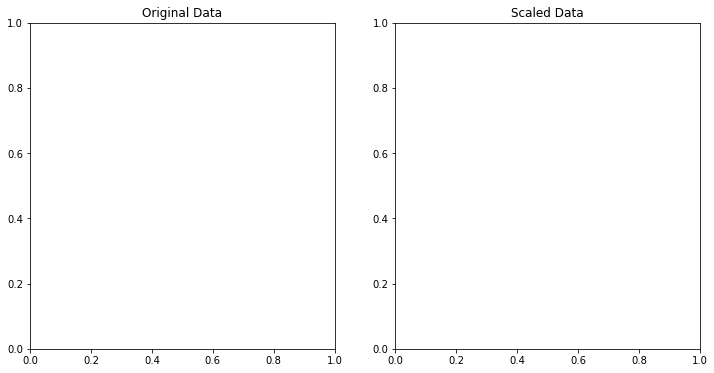

In [23]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train['onVentilatorCurrently'].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train['onVentilatorCurrently'], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

###  Fit the Model to the scaled training data and make predictions using the scaled test data

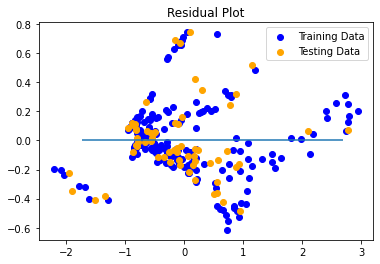

In [24]:
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [25]:
print(f"Training scaled Data Score: {model.score(X_train_scaled, y_train_scaled)}")
print(f"Testing scaled Data Score: {model.score(X_test_scaled, y_test_scaled)}")
print('Weight coefficients:', model.coef_)
print('y-axis intercept:', model.intercept_)


Training scaled Data Score: 0.9378955734072969
Testing scaled Data Score: 0.9060996202708099
Weight coefficients: [[ 0.47327385  0.06569163  0.5863457   0.27370483 -0.23123137]]
y-axis intercept: [2.75933099e-16]


## Quantify the model using scaled data

In [26]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.0638637847368424, R2: 0.9060996202708099


In [27]:
X_scaled = X_scaler.transform(X)
predictions = model.predict(X_scaled)
print(f"True output:{y[0]}")
print(f"Predicted output:{y_scaler.inverse_transform(predictions[0]).round(2)}") 
print(f"Prediction Error:{y_scaler.inverse_transform(predictions[0]).round(2)-y[0]}") 

True output:[20145.]
Predicted output:[20945.23]
Prediction Error:[800.23]


In [28]:
predicted_y = y_scaler.inverse_transform(predictions).round(2)
predicted_y.reshape(1,-1).tolist()[0]


[20945.23,
 20235.98,
 20111.02,
 20231.08,
 20343.52,
 20273.25,
 20046.36,
 19442.1,
 18858.64,
 17684.34,
 18811.13,
 17926.47,
 17572.83,
 17128.09,
 16463.92,
 15793.13,
 15376.46,
 15181.9,
 15177.65,
 14520.06,
 13805.81,
 13017.01,
 12762.98,
 12264.07,
 12259.16,
 11820.89,
 11551.28,
 11025.55,
 10592.69,
 10162.8,
 10080.08,
 9978.91,
 10082.08,
 10065.57,
 9547.77,
 9404.67,
 9117.5,
 8900.13,
 8869.21,
 8872.28,
 8780.62,
 8713.55,
 8262.28,
 8072.59,
 10006.58,
 8128.35,
 8132.94,
 7968.72,
 7471.25,
 7277.38,
 7344.34,
 7103.19,
 7228.47,
 7403.09,
 7316.24,
 7065.2,
 6859.84,
 6734.49,
 6792.92,
 6783.23,
 6760.68,
 6379.08,
 6472.36,
 6122.51,
 5953.97,
 6147.14,
 6277.17,
 6238.7,
 6317.55,
 6164.13,
 6055.78,
 5897.06,
 5772.62,
 6113.25,
 6153.0,
 5909.68,
 5949.35,
 5928.03,
 5847.3,
 5939.84,
 6125.79,
 6203.37,
 6215.53,
 6031.14,
 5989.45,
 6088.7,
 6284.04,
 6776.55,
 6945.72,
 6904.76,
 6671.13,
 6656.32,
 6708.83,
 6681.71,
 6968.17,
 7343.29,
 7118.81,
 7211

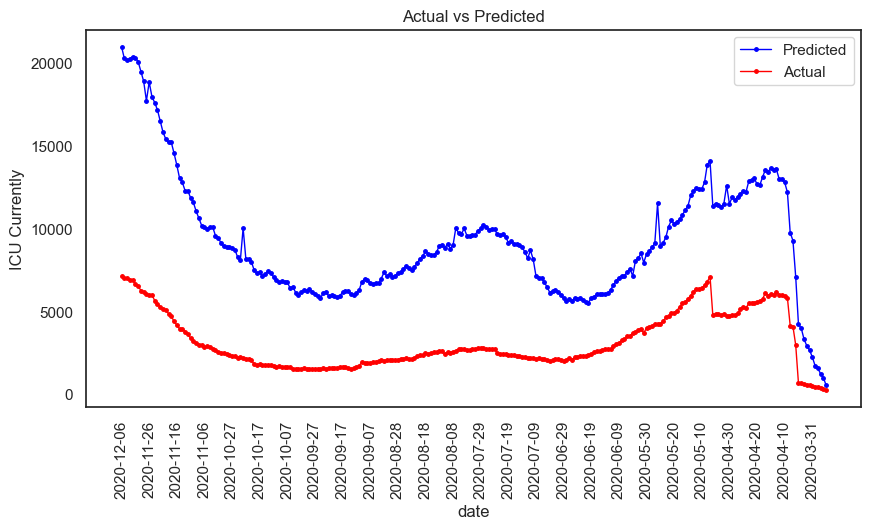

In [29]:
sns.set(style='white')

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(df_Covid_data.index, predicted_y, label="Predicted", linewidth=1, marker='.', markersize=5, color='blue')
plt.plot(df_Covid_data.index, df_Covid_data['onVentilatorCurrently'], label="Actual", linewidth=1, marker='.', markersize=5, color='red')
# plt.plot(dc.index, dc["Error"], label="Error", linewidth=1, marker='.', markersize=10, color='green')


plt.xticks(df_Covid_data.index[::10], rotation=90)
plt.title('Actual vs Predicted')
plt.xlabel('date')
plt.ylabel('ICU Currently')

plt.legend()
#plt.savefig('covid_outbreak.png', dpi=100)
plt.show()